# Boolean Gates

**(Run this cell to define useful Latex macros)**
\\[
\newcommand{\bigoh}[1]{\mathcal{O}\left(#1\right)}
\newcommand{\card}[1]{\left\lvert#1\right\rvert}
\newcommand{\condbar}[0]{\,\big|\,}
\newcommand{\eprob}[1]{\widehat{\text{Pr}}\left[#1\right]}
\newcommand{\norm}[1]{\left\lvert\left\lvert#1\right\rvert\right\rvert}
\newcommand{\prob}[1]{\text{Pr}\left[#1\right]}
\newcommand{\pprob}[2]{\text{Pr}_{#1}\left[#2\right]}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\fpartial}[2]{\frac{\partial #1}{\partial #2}}
\\]

In the last notebook, I showed that the XOR relationship cannot be linearly separated. That means that no logistic regression classifier can learn the relationship $Y = X_1 \oplus X_2$ without us adding in a new cross term.

Before I continue, I want to show that you *can* build the XOR relationship out of a *sequence* of linearly separable relationships. In this sense, we can hope that linear separable relationships are still "sufficient:" we just need to build more complicated classifiers out of them.

In fact, any complicated *Boolean formula* can be defined in terms of a sequence of simpler Boolean relationships. The only ones you really need are NOT and AND. Or NOT and OR. Or just NAND! Any of those are a "minimum viable set" to generate any other kind of complex relationship between boolean variables.

For convenience, it is nice to start with NOT, AND, and OR, and build from there. This is more than you strictly need, but it's more convenient and nicer.

The magic is that NOT, AND, and OR are all linearly separable relationship. That means that a linear classifier like logistic regression can learn them. And that means that you any Boolean formula, no matter how complex, can always be built out of linear classifiers.

Any discrete function on a finite domain can be represented as a Boolean circuit. That means that fixed-width integer addition, subtraction, multiplication, and (integer) division can all be written as Boolean circuits. 

Guess what: that's exactly the kind of circuitry that exists in your computer! There are circuits that take in boolean inputs (the ones and zeros of the input integers) and do some "logical" operation that corresponds to addition/subtraction/et cetera and spit out boolean outputs: the ones and zeros of the output integer!

So, if we can build any Boolean circuit from linear classifiers, that's a pretty big deal!

### AND Is Linearly Separable

The AND relationship is linearly separable, so that means that there is a linear classifier that can learn it. That means there is a linear classifier that spits out a positive number whenever $AND(X_1, X_2)$ is true, and a negative number if $AND(X_1, X_2)$ is false.

Important note: I'm assuming that the input values are binarized: they are either zero or one.

The output is *not* binarized, but I will assume that we also have a *nonlinear* function that makes any negative number zero, and any positive number 1. This will be important for when we feed the output of one "logic gate" into another.

(-1, 2)

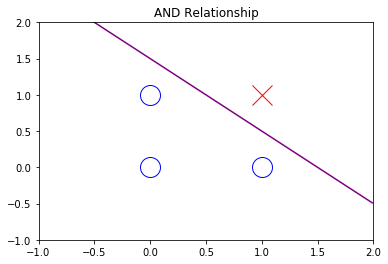

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    [1],
    [1],
    'x',
    color = 'red',
    markersize = 20,
)

plt.plot(
    [0, 0, 1],
    [0, 1, 0],
    'o',
    color = 'blue',
    markerfacecolor = 'none',
    markersize = 20,
)

x = np.arange(-1, 2.0, 0.01)
plt.plot(
    x,
    -x + 1.5,
    '-',
    color = 'purple',
)

plt.title('AND Relationship')
plt.ylim(ymin = -1, ymax = +2)
plt.xlim(xmin = -1, xmax = +2)


### Or Is Linearly Separable Too

Here's a graph to show you that the pairs of $X_1, X_2$ that result in $OR(X_1, X_2) = 1$ are linearly separable form those that give $OR(X_1, X_2) = 0$. Again, that means that a linear classifier can learn this relationship


(-1, 2)

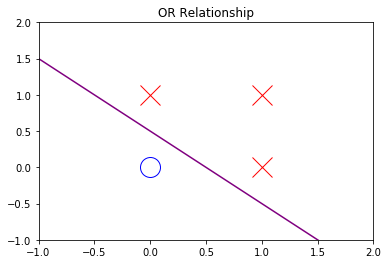

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    [0, 1, 1],
    [1, 0, 1],
    'x',
    color = 'red',
    markersize = 20,
)

plt.plot(
    [0],
    [0],
    'o',
    color = 'blue',
    markerfacecolor = 'none',
    markersize = 20,
)

x = np.arange(-1, 2.0, 0.01)
plt.plot(
    x,
    -x + 0.5,
    '-',
    color = 'purple',
)

plt.title('OR Relationship')
plt.ylim(ymin = -1, ymax = +2)
plt.xlim(xmin = -1, xmax = +2)


### NOT Is Linearly Separable

This one is a *unary* operation. It will look a little weird because I have an unneeded $y$ axis here...

(-1, 2)

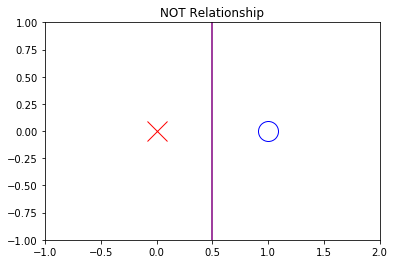

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(
    [0],
    [0],
    'x',
    color = 'red',
    markersize = 20,
)

plt.plot(
    [1],
    [0],
    'o',
    color = 'blue',
    markerfacecolor = 'none',
    markersize = 20,
)

plt.plot(
    [0.5, 0.5],
    [-1, 1.0],
    '-',
    color = 'purple',
)

plt.title('NOT Relationship')
plt.ylim(ymin = -1, ymax = +1)
plt.xlim(xmin = -1, xmax = +2)


### Building XOR from AND and NOT

In order to get started let me show how to build an `XOR` relationship out of `NOT`s and `AND` and `OR`:

\\[
XOR(X_1, X_2)
:=
\text{OR}\Big(
    \text{AND}\big(
        X_1,
        \text{NOT}\left(
            X_2
        \right)
    \big),
    \text{AND}\big(
        \text{NOT}\left(
            X_1
        \right),
        X_2
    \big)
\Big)
\\]

Or written in logic notation:

\\[
X_1 \oplus X_2
:=
    \big(
        X_1
        \wedge
        \neg X_2
    \big)
\vee
    \big(
        \neg X_1
        \wedge
        X_2
    \big)
\\]

Let's write this as a sequence of layers of logic operations. Each layer can only use inputs from the previous layer. (Some neural networks actually do allow *skip connections*, but more on that much later!)

I see three layers of logical operations here:

1. Layer 1: Take as initial input $X_1, X_2$, and output $X_1, X_2, \neg X_1, \neg X_2$.
2. Layer 2: Take as input $X_1, X_2, \neg X_1, \neg X_2$ and output $X_1 \wedge \neg X_2, \neg X_1 \wedge X_2$.
3. Layer 3: Take as input $X_1 \wedge \neg X_2, \neg X_1 \wedge X_2$ and output finally $\big(X_1 \wedge \neg X_2\big) \vee \big(\neg X_1 \wedge X_2\big)$.